In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [4]:
df=pd.read_csv("Road_accident.csv")
print(df.head())

  collision_index  collision_year collision_reference  vehicle_reference  \
0   2023010419171            2023           010419171                  1   
1   2023010419183            2023           010419183                  2   
2   2023010419183            2023           010419183                  3   
3   2023010419189            2023           010419189                  1   
4   2023010419191            2023           010419191                  2   

   casualty_reference  casualty_class  sex_of_casualty  age_of_casualty  \
0                   1               3                2               20   
1                   1               1                1               25   
2                   2               2                2               38   
3                   1               1                1               50   
4                   1               1                1               34   

   age_band_of_casualty  casualty_severity  pedestrian_location  \
0                     4  

In [8]:
df.head()

,collision_index,collision_year,collision_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile,lsoa_of_casualty
0,2023010419171,2023,010419171,1,1,3,2,20,4,3,5,1,0,0,0,0,1,10,E01030370
1,2023010419183,2023,010419183,2,1,1,1,25,5,3,0,0,0,0,0,9,1,3,E01001546
2,2023010419183,2023,010419183,3,2,2,2,38,7,3,0,0,2,0,0,9,-1,-1,-1
3,2023010419189,2023,010419189,1,1,1,1,50,8,3,0,0,0,0,0,9,1,5,E01002443
4,2023010419191,2023,010419191,2,1,1,1,34,6,3,0,0,0,0,0,1,1,2,E01004679


In [9]:
df.shape


(62674, 19)

In [10]:
df.isnull().sum()

collision_index                       0
collision_year                        0
collision_reference                   0
vehicle_reference                     0
casualty_reference                    0
casualty_class                        0
sex_of_casualty                       0
age_of_casualty                       0
age_band_of_casualty                  0
casualty_severity                     0
pedestrian_location                   0
pedestrian_movement                   0
car_passenger                         0
bus_or_coach_passenger                0
pedestrian_road_maintenance_worker    0
casualty_type                         0
casualty_home_area_type               0
casualty_imd_decile                   0
lsoa_of_casualty                      0
dtype: int64

In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
df.describe()

,collision_year,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
count,62674.0,62674.000000,62674.000000,62674.000000,62674.000000,62674.000000,62674.000000,62674.000000,62674.000000,62674.000000,62674.000000,62674.000000,62674.000000,62674.000000,62674.000000,62674.000000
mean,2023.0,1.467562,1.374972,1.491177,1.358107,36.953697,6.315410,2.785046,0.808709,0.663369,0.224623,0.062338,0.037208,9.507643,1.049925,4.259980
std,0.0,4.849047,1.551044,0.737688,0.548781,19.805649,2.491679,0.438231,2.208673,2.041672,0.620338,0.484295,0.284849,16.671019,0.932578,3.221955
min,2023.0,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,1.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,2023.0,1.000000,1.000000,1.000000,1.000000,22.000000,5.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000
50%,2023.0,1.000000,1.000000,1.000000,1.000000,34.000000,6.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,4.000000
75%,2023.0,2.000000,1.000000,2.000000,2.000000,51.000000,8.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,7.000000
max,2023.0,992.000000,70.000000,3.000000,9.000000,102.000000,11.000000,3.000000,10.000000,9.000000,9.000000,9.000000,2.000000,98.000000,3.000000,10.000000


In [13]:
print("\nAnalysis by casualty class:")
print(df['casualty_class'].value_counts())


Analysis by casualty class:
casualty_class
1    41111
2    12342
3     9221
Name: count, dtype: int64


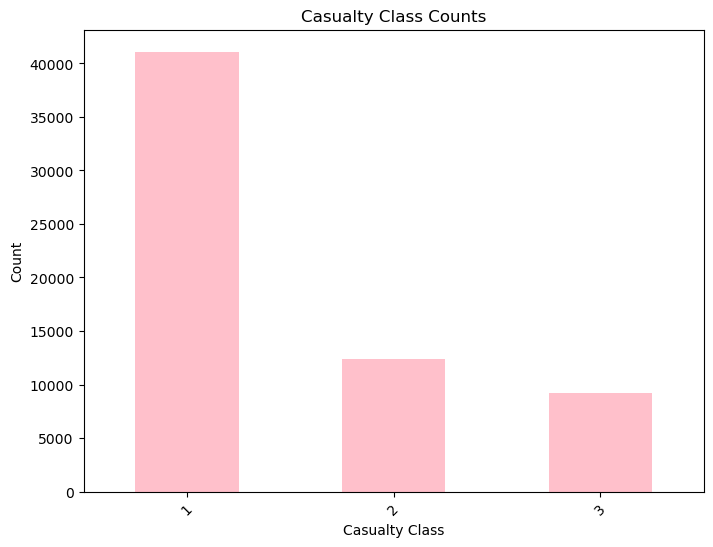

In [14]:
# Bar plot of casualty class counts
casualty_class_counts = df['casualty_class'].value_counts()
plt.figure(figsize=(8, 6))
casualty_class_counts.plot(kind='bar', color='pink')
plt.title('Casualty Class Counts')
plt.xlabel('Casualty Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Rows with invalid age values:
      collision_index  collision_year collision_reference  vehicle_reference  \
12      2023010419228            2023           010419228                  1   
13      2023010419228            2023           010419228                  1   
46      2023010419349            2023           010419349                  1   
51      2023010419379            2023           010419379                  2   
72      2023010419418            2023           010419418                  1   
...               ...             ...                 ...                ...   
59647   202363A036623            2023           63A036623                  2   
59743   202363C010023            2023           63C010023                  2   
59813   202363C036523            2023           63C036523                  1   
60788   2023991283620            2023           991283620                  1   
61302   2023991295073            2023           991295073                  2   

       ca

C:\Users\arpit\AppData\Local\Temp\ipykernel_20428\4036894797.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age_of_casualty'].fillna(median_age, inplace=True)


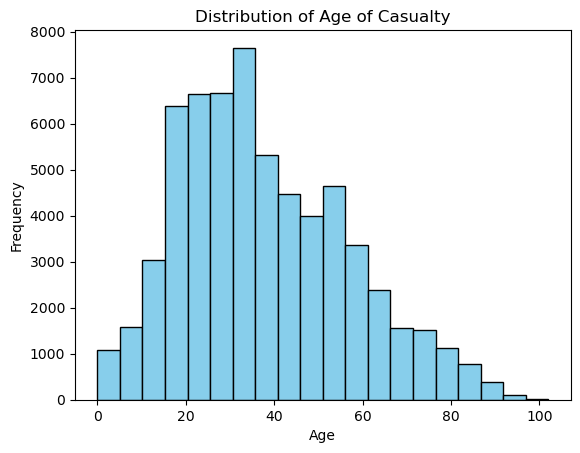

In [15]:
# Identify Invalid Values
invalid_age_rows = df[(df['age_of_casualty'] < 0) | (df['age_of_casualty'] > 103)]  # Adjust upper limit based on domain knowledge
print("Rows with invalid age values:")
print(invalid_age_rows)

#  Replace Invalid Values
df.loc[df['age_of_casualty'] < 0, 'age_of_casualty'] = pd.NA  # Replace negative values with NaN


# Impute missing age values with median age
median_age = df['age_of_casualty'].median()
df['age_of_casualty'].fillna(median_age, inplace=True)

# Step 4: Visualize Distribution
df['age_of_casualty'].plot(kind='hist', bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Age of Casualty')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

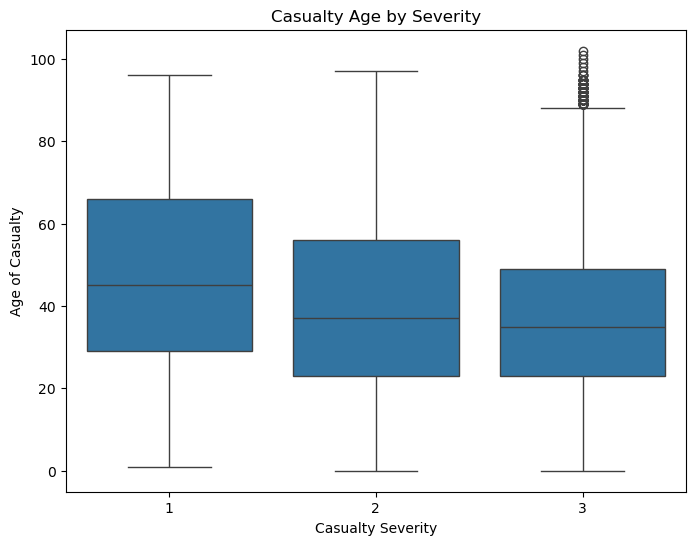

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.boxplot(x='casualty_severity', y='age_of_casualty', data=df)
plt.title('Casualty Age by Severity')
plt.xlabel('Casualty Severity')
plt.ylabel('Age of Casualty')
plt.show()

In [20]:

# Analysis by gender of casualty
print("\nAnalysis by gender of casualty:")
print(df['sex_of_casualty'].value_counts())

# Analysis by age band of casualty
print("\nAnalysis by age band of casualty:")
print(df['age_band_of_casualty'].value_counts())

# Analysis by pedestrian involvement
print("\nAnalysis by pedestrian involvement:")
print(df['pedestrian_location'].value_counts())

# Analysis by area type of casualty
print("\nAnalysis by area type of casualty:")
print(df['casualty_home_area_type'].value_counts())

# Analysis by IMD decile
print("\nAnalysis by IMD decile:")
print(df['casualty_imd_decile'].value_counts())

# Analysis by casualty type
print("\nAnalysis by casualty type:")
print(df['casualty_type'].value_counts())


Analysis by gender of casualty:
sex_of_casualty
 1    38171
 2    23800
-1      698
 9        5
Name: count, dtype: int64

Analysis by age band of casualty:
age_band_of_casualty
 6     12899
 7      9793
 8      7881
 5      6638
 4      6387
 9      6119
 10     3133
 3      3038
 11     2702
 2      1588
-1      1414
 1      1082
Name: count, dtype: int64

Analysis by pedestrian involvement:
pedestrian_location
 0     53452
 5      3328
 1      1545
 6      1164
 10      911
 9       897
 8       688
 4       581
 7        55
 2        35
 3        17
-1         1
Name: count, dtype: int64

Analysis by area type of casualty:
casualty_home_area_type
 1    45544
-1     6628
 3     5883
 2     4619
Name: count, dtype: int64

Analysis by IMD decile:
casualty_imd_decile
 2     7151
 1     7011
-1     6930
 3     6664
 4     6281
 5     5780
 6     5544
 7     4764
 8     4626
 9     4259
 10    3664
Name: count, dtype: int64

Analysis by casualty type:
casualty_type
 9     33417
 0      

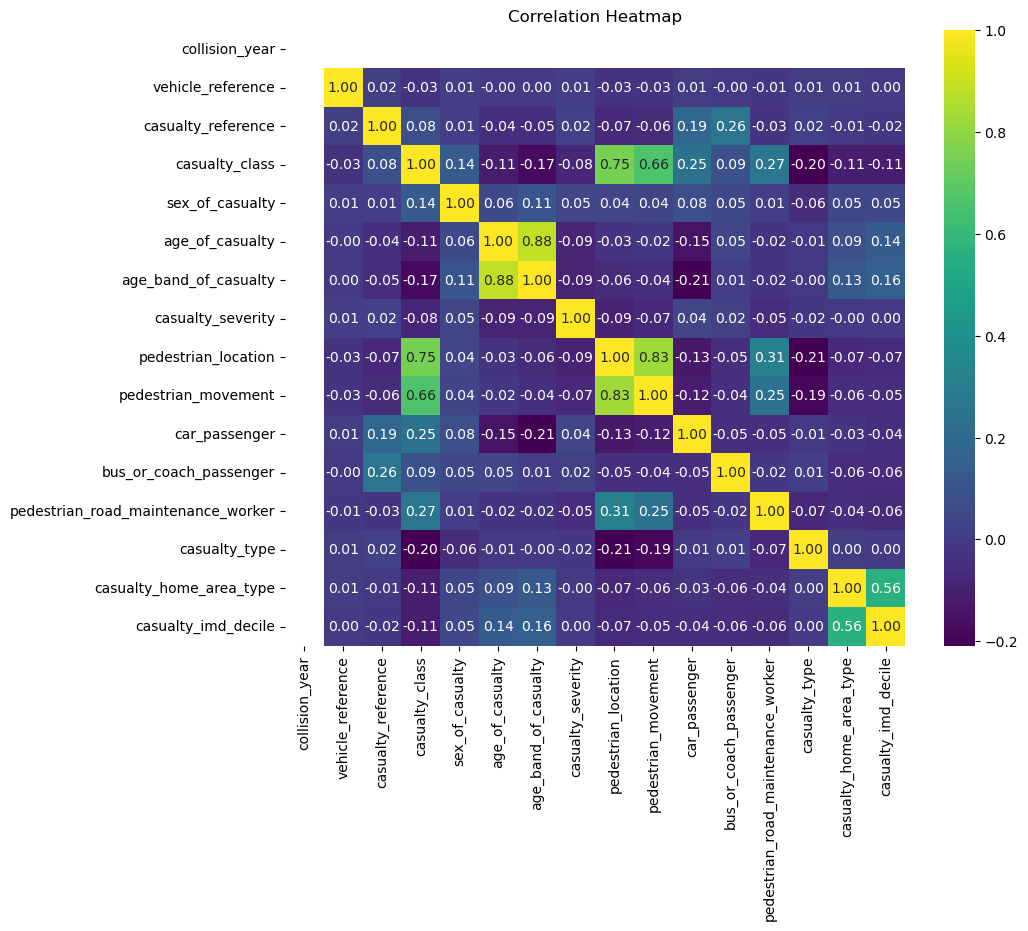

In [21]:
cols = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(10, 8))
sns.heatmap(df[cols].corr(), annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()